# Fibonacci method

Se debe conocer el intervalo de busqueda y  en cada evaluación el metodo tiende a acorralar el punto óptimo

In [1]:
%matplotlib inline  

Librerias para mostrar graficas y animarlas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Ecuacion a optimizar: 
$f(x) = (x+1)^2$,
Minimo en x=-1

In [3]:
def equation(x):
    y=(x+1)**2
    return y

Grafica de la ecuacion 

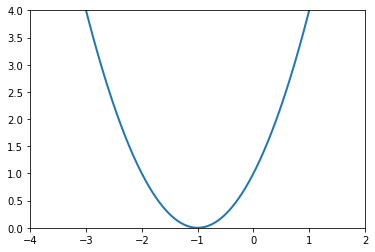

In [4]:
x1, x2= -4, 2
fig, ax = plt.subplots();
# generar grafica
x = np.linspace(x1, x2, 1000)
y = equation(x)
ax.set_xlim((x1, x2))
ax.set_ylim((0, 4))
# ecuacion
line0,  = ax.plot(x, y, lw=2);
# lineas horizontales
line1,  = ax.plot([], [], lw=2);
line2,  = ax.plot([], [], lw=2);
# puntos 
point1, = ax.plot([], [], 'o')
point2, = ax.plot([], [], 'o')

In [5]:
def fibonacci(n):
    f=1
    f_old=1
    for i in range(n-1):
        f=f_old+f;
        f_old = f - f_old;
    return f;
def fibonacci_method(x1,x2,n):
    l0 = x2-x1
    delta  = l0 *(fibonacci(n-2)/fibonacci(n))
    x1_new = x1 + delta
    x2_new = x2 - delta
    if equation(x1_new) >= equation(x2_new):
        return x1_new,x2;
    else :
        return x1,x2_new;

$\Delta_{1} = L_{0}  *  \frac{F_{n-2}}{F_{n}}$,$\Delta_{2} = L_{1}  *  \frac{F_{n-3}}{F_{n-1}}$,

$f(x1) >= f(x2)$ : Se rechaza el intervalo de $x1<x<x1'$ <br />
$f(x1) < f(x2)$ : Se rechaza el intercalo de $x2'<x<x2$

In [6]:
x1,x2 = -4,2
tol=5e-3
n=0;
while tol < (1/fibonacci(n)):
    n=n+1
print ('n es igual a:', n)
print("Iter      x1        x2") 
for i in range(n,2,-1):
    x1,x2 = fibonacci_method(x1,x2,i)
    print(' '+str(i) +'    '+str("{0:.4f}".format(x1))+'    '+str("{0:.4f}".format(x2)))
print ("Efectividad:",("{0:.4f}".format((1/fibonacci(n)))))
print ("Punto Minimo: ",(x1+x2)/2)

n es igual a: 12
Iter      x1        x2
 12    -1.7082    2.0000
 11    -1.7082    0.5837
 10    -1.7082    -0.2918
 9    -1.7082    -0.8326
 8    -1.3734    -0.8326
 7    -1.1674    -0.8326
 6    -1.1674    -0.9614
 5    -1.0901    -0.9614
 4    -1.0386    -0.9614
 3    -1.0386    -0.9871
Efectividad: 0.0043
Punto Minimo:  -1.0128755364806865


La efectividad es  $\frac{1}{F_{n}}$

In [7]:
def init() :
    x1,x2 = -4,2
    
    x  = np.linspace(x1,x2, 1000)
    y  = equation(x)
    line0.set_data(x, y)
    
    line1.set_data(np.full(10,  x1), np.linspace(0,4,10))
    line2.set_data(np.full(10,  x2), np.linspace(0,4,10))
    
    point1.set_data(x1,equation(x1))
    point2.set_data(x2,equation(x2))
    return ([line0,line1,line2,point1,point2])

In [8]:
# animation function. This is called sequentially
x1, x2= -4 , 2
def animate(i):
    global x1,x2
    if(i!=0):
        x1,x2 = fibonacci_method(x1,x2,n-i)
    x  = np.linspace(x1,x2, 1000)
    y  = equation(x)
    line0.set_data(x, y)
    
    line1.set_data(np.full(10,  x1), np.linspace(0,4,10))
    line2.set_data(np.full(10,  x2), np.linspace(0,4,10))
    
    point1.set_data(x1,equation(x1))
    point2.set_data(x2,equation(x2))
    
    return ([line0,line1,line2,point1,point2])

# call the animator. blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=3, interval=3, blit=True)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=n-2,interval=500 ,blit=True)

In [9]:
HTML(anim.to_jshtml())